## Observations and Insights 

My observations here:


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df=pd.merge(study_results, mouse_metadata, how ="left",on="Mouse ID")
combined_df
# print(mouse_metadata)
# print(study_results)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice in the DataFrame.
mice_count = len(study_results["Mouse ID"].unique())
mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
# dup_mice


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.loc[combined_df["Mouse ID"] != 'g989']
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

no_mice = len((clean_df["Mouse ID"]).unique())
no_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

mean_gr = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# print(mean_gr)
median_gr = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# print(median_gr)
variance_gr = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# print(variance_gr)
std_gr = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# print(std_gr)
sem_gr = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# print(sem_gr)

summary_gr = pd.DataFrame({'Mean': mean_gr,
                          'Median':median_gr,
                          'Variance': variance_gr,
                          'Standard Deviation': std_gr,
                          'SEM': sem_gr                  
                          })
summary_gr



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_key = summary.reset_index()
summary_key

,Drug Regimen,count,mean,std,min,25%,50%,75%,max
0,Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
1,Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
2,Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
3,Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
4,Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
5,Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
6,Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
7,Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
8,Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
9,Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432


## Bar Plots

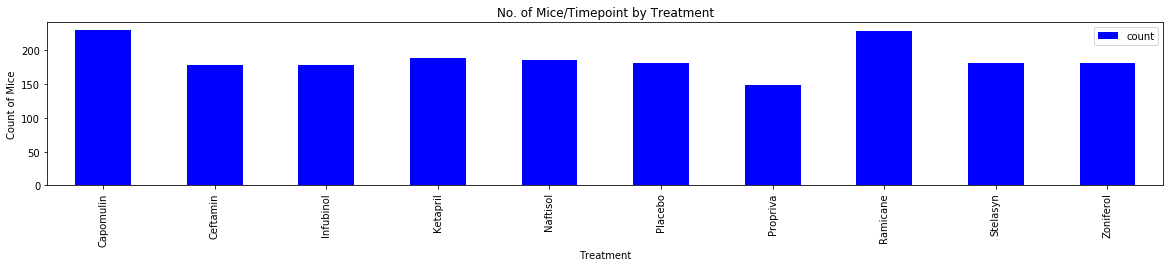

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mice_treatment = summary_key[['Drug Regimen', 'count']]
mice_treatment = mice_treatment.set_index('Drug Regimen')

mice_treatment.plot(kind="bar", figsize=(20,3), color="blue")
plt.title('No. of Mice/Timepoint by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count of Mice')
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Count of Mice')

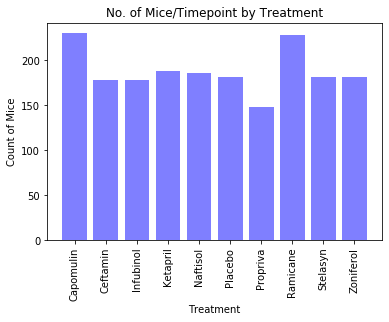

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = summary_key['Drug Regimen']
y_axis = summary_key['count']

plt.bar(x_axis, y_axis, facecolor = 'blue', alpha=0.5, align = 'center')
plt.xticks(rotation = 90)
plt.title('No. of Mice/Timepoint by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count of Mice')



## Pie Plots

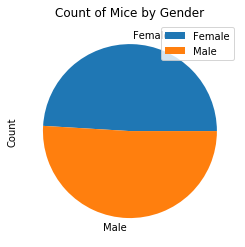

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distr = clean_df.groupby("Sex")
distribution = gender_distr['Mouse ID'].count().to_frame()
distribution = distribution.rename(columns={"Mouse ID": "Count"})
# distribution = distribution.reset_index()

# distribution = distribution.set_index('Sex')

distribution

distribution.plot(kind='pie', subplots=True)
plt.title('Count of Mice by Gender')
plt.show()



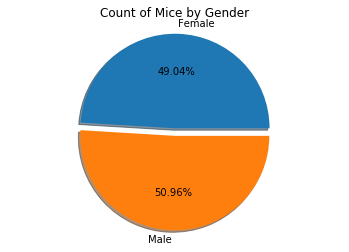

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

distribution = distribution.reset_index()
x_axis = distribution['Sex']
y_axis = distribution['Count']
explode = (0, 0.08)


# plt.pie(members, explode = explode, labels = gyms, colors = colors, autopct = "%1.2f%%", shadow = True, startangle = 90)
# plt.axis("equal")

# distribution

plt.pie(y_axis, explode = explode, labels = x_axis , autopct = "%1.2f%%", shadow = True, startangle = 0)
plt.title('Count of Mice by Gender')
plt.axis("equal")
plt.show()





## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# volume = summary_gr.sort_values(['Mean'],ascending=True)
# ,'Ramicane','Infubinol','Ceftamin'
volume_capomulin = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])]
volume_gr_capomulin = volume_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].sum()
# print(volume_gr_capomulin)

volume_gr_capomulin = pd.DataFrame({'Total Volume': volume_gr_capomulin})
print(volume_gr_capomulin)

quartiles_capomulin = volume_gr_capomulin['Total Volume'].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin

print(f"the lower quartile: {lowerq_capomulin}")
print(f"the upper quartile: {upperq_capomulin}")
print(f"the interquartile:{iqr_capomulin}")
print(f"the median is: {quartiles_capomulin[.5]}")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"values below {lower_bound_capomulin} could be outliers")
print(f"values above {upper_bound_capomulin} could be outliers")

outliers_capomulin = volume_gr_capomulin.loc[(volume_gr_capomulin["Total Volume"] < lower_bound_capomulin) | 
                                   (volume_gr_capomulin["Total Volume"] > upper_bound_capomulin)]
# print(outliers_capomulin)

# Ramicane

volume_ramicane = clean_df[clean_df['Drug Regimen'].isin(['Ramicane'])]
volume_gr_ramicane = volume_ramicane.groupby('Mouse ID')['Tumor Volume (mm3)'].sum()
# print(volume_gr_ramicane)

volume_gr_ramicane = pd.DataFrame({'Total Volume': volume_gr_ramicane})
print(volume_gr_ramicane)

quartiles_ramicane = volume_gr_ramicane['Total Volume'].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane

print(f"the lower quartile: {lowerq_ramicane}")
print(f"the upper quartile: {upperq_ramicane}")
print(f"the interquartile:{iqr_ramicane}")
print(f"the median is: {quartiles_ramicane[.5]}")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"values below {lower_bound_ramicane} could be outliers")
print(f"values above {upper_bound_ramicane} could be outliers")

outliers_ramicane = volume_gr_ramicane.loc[(volume_gr_ramicane["Total Volume"] < lower_bound_ramicane) | 
                                   (volume_gr_ramicane["Total Volume"] > upper_bound_ramicane)]
# print(outliers_ramicane)

# Infubinol

volume_infubinol = clean_df[clean_df['Drug Regimen'].isin(['Infubinol'])]
volume_gr_infubinol = volume_infubinol.groupby('Mouse ID')['Tumor Volume (mm3)'].sum()
# print(volume_gr_infubinol)

volume_gr_infubinol = pd.DataFrame({'Total Volume': volume_gr_infubinol})
print(volume_gr_infubinol)

quartiles_infubinol = volume_gr_infubinol['Total Volume'].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol

print(f"the lower quartile: {lowerq_infubinol}")
print(f"the upper quartile: {upperq_infubinol}")
print(f"the interquartile:{iqr_infubinol}")
print(f"the median is: {quartiles_infubinol[.5]}")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"values below {lower_bound_infubinol} could be outliers")
print(f"values above {upper_bound_infubinol} could be outliers")

outliers_infubinol = volume_gr_infubinol.loc[(volume_gr_infubinol["Total Volume"] < lower_bound_infubinol) | 
                                   (volume_gr_infubinol["Total Volume"] > upper_bound_infubinol)]
# print(outliers_infubinol)


# Ceftamin

volume_ceftamin = clean_df[clean_df['Drug Regimen'].isin(['Ceftamin'])]
volume_gr_ceftamin = volume_ceftamin.groupby('Mouse ID')['Tumor Volume (mm3)'].sum()
# print(volume_gr_ceftamin)

volume_gr_ceftamin = pd.DataFrame({'Total Volume': volume_gr_ceftamin})
print(volume_gr_ceftamin)

quartiles_ceftamin = volume_gr_ceftamin['Total Volume'].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

print(f"the lower quartile: {lowerq_ceftamin}")
print(f"the upper quartile: {upperq_ceftamin}")
print(f"the interquartile:{iqr_ceftamin}")
print(f"the median is: {quartiles_ceftamin[.5]}")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"values below {lower_bound_ceftamin} could be outliers")
print(f"values above {upper_bound_ceftamin} could be outliers")

outliers_ceftamin = volume_gr_ceftamin.loc[(volume_gr_ceftamin["Total Volume"] < lower_bound_ceftamin) | 
                                   (volume_gr_ceftamin["Total Volume"] > upper_bound_ceftamin)]
print(outliers_ceftamin)





          Total Volume
Mouse ID              
b128        419.636356
b742        400.836993
f966        182.529864
g288        419.900966
g316        446.133439
i557        448.058097
i738        391.410528
j119        444.652363
j246        345.735397
l509        444.344738
l897        425.072610
m601        348.474699
m957        390.498164
r157        183.195878
r554        365.092120
r944        433.673645
s185        345.591434
s710        428.037330
t565        393.287251
u364        398.874952
v923        415.815951
w150        124.154476
w914        413.524523
x401        361.820396
y793        385.068292
the lower quartile: 361.82039562
the upper quartile: 425.07261035000005
the interquartile:63.25221473000005
the median is: 398.87495191
values below 266.94207352499996 could be outliers
values above 519.9509324450001 could be outliers
          Total Volume
Mouse ID              
a411        407.013854
a444        430.600524
a520        379.892187
a644        412.285775
c458  

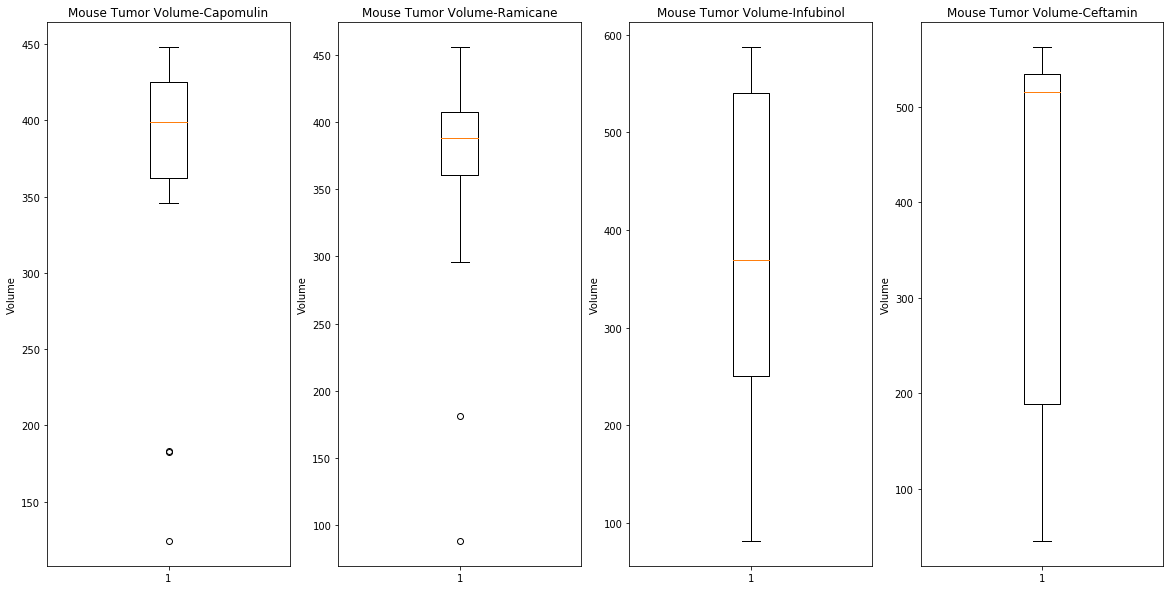

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 10))

ax1.set_title('Mouse Tumor Volume-Capomulin')
ax1.set_ylabel('Volume')
ax1.boxplot(volume_gr_capomulin['Total Volume'])

ax2.set_title('Mouse Tumor Volume-Ramicane')
ax2.set_ylabel('Volume')
ax2.boxplot(volume_gr_ramicane['Total Volume'])

ax3.set_title('Mouse Tumor Volume-Infubinol')
ax3.set_ylabel('Volume')
ax3.boxplot(volume_gr_infubinol['Total Volume'])

ax4.set_title('Mouse Tumor Volume-Ceftamin')
ax4.set_ylabel('Volume')
ax4.boxplot(volume_gr_ceftamin['Total Volume'])


plt.show()




## Line and Scatter Plots

239      0
432      5
630     10
761     15
1001    20
1118    25
1412    30
1556    35
1650    40
1888    45
Name: Timepoint, dtype: int64
239     45.00
432     45.74
630     46.54
761     47.37
1001    43.23
1118    41.09
1412    41.68
1556    40.40
1650    41.04
1888    41.58
Name: Tumor Volume (mm3), dtype: float64


Text(0, 0.5, 'Tumor Volume (mm3)')

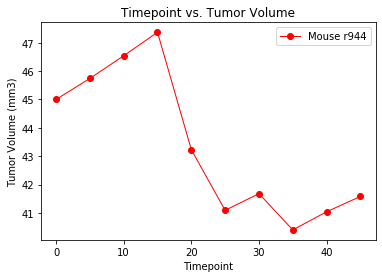

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

volume_line_capomulin = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
volume_b742_capomulin = volume_line_capomulin.loc[volume_line_capomulin['Mouse ID']=='r944']

volume_b742_capomulin

timepoint = volume_b742_capomulin['Timepoint']
print(timepoint)
tumor_vol = round(volume_b742_capomulin['Tumor Volume (mm3)'],2)
print(tumor_vol)


# x_axis = np.arange(0,10,1)
# timepoint, = plt.plot(x_axis, timepoint, marker = "^", color = "blue", linewidth= 1, label = "Timepoint")
tumor_vol, = plt.plot(timepoint, tumor_vol,marker = "o", color = "red", linewidth = 1, label = "Mouse r944")
plt.legend(handles=[tumor_vol], loc="best")
plt.title('Timepoint vs. Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



Text(0.5, 1.0, 'Mouse Weight vs. Avg Tumor Volume - Capomulin ')

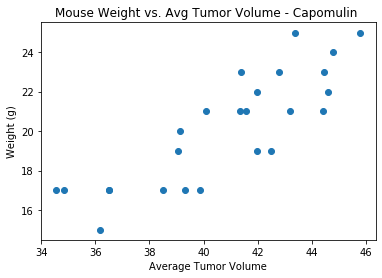

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

volume_line_capomulin
avg_volume = volume_line_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = volume_line_capomulin.groupby('Mouse ID')['Weight (g)'].mean()
weight

plt.scatter(avg_volume, weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Weight (g)')
plt.title('Mouse Weight vs. Avg Tumor Volume - Capomulin ')


## Correlation and Regression

The correlation between both factors is 0.84


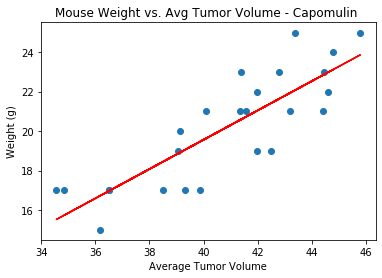

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_volume, weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_volume, weight)
regress_values = avg_volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

plt.scatter(avg_volume, weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Weight (g)')
plt.title('Mouse Weight vs. Avg Tumor Volume - Capomulin ')
plt.plot(avg_volume, regress_values, "r-")